In [1]:
import pandas as pd

df = pd.read_csv('text_quality_labelling.csv', header=1)
# delete the last row
df = df[:-1]
df['dataset'] = df['state_filename'].apply(lambda x: 'Internal' if 'state_2022' in x else 'OpenSource')

In [2]:
# convert 'O' -> True, 'X' -> False
df = df.replace({'O': True, 'X': False})
df

,index,app_name,state_filename,textfield_id,category_matching,llm_base,droidfiller-reasoning,droidfiller-functioncall,droidfiller,dataset
0,1.0,org.koitharu.kotatsu,state_-1399196902,searchView_198_119,True,True,True,True,True,OpenSource
1,2.0,AOL_News_Mail_Video_v6.47.2,state_-2077864795,search_edit_text_182_66,True,True,False,True,True,OpenSource
2,3.0,de.kromke.andreas.opus1musicplayer,state_1643267838,search_src_text_111_71,True,True,True,True,True,OpenSource
3,4.0,Petal_Maps‚ÄìGPS_Navigation_v2.5.0.303(002),state_-1677063389,search_src_text_174_1600,True,True,True,True,True,OpenSource
4,5.0,AutoScout24_Buy_sell_cars,state_1694299268,textinput_filter_edittext_188_301,True,True,True,True,True,OpenSource
...,...,...,...,...,...,...,...,...,...,...
115,127.0,Clock,state_2022-11-01_184421020236,worldclock_search_map_txt_find_158_140,True,True,True,True,True,Internal
116,128.0,Clock,state_2022-11-01_184455299444,hour_48_1787,False,True,True,True,True,Internal
117,129.0,Clock,state_2022-11-01_184455299444,minute_201_1787,False,True,True,True,True,Internal
118,130.0,Clock,state_2022-11-01_184455299444,second_354_1787,False,True,True,True,True,Internal


In [3]:
results = [] 


results.append({
    'Technique': 'DroidFilller',
    'num_true': df[(df['droidfiller'] == True)].shape[0],
})

results.append({
    'Technique': '-FunctionCall',
    'num_true': df[(df['droidfiller-functioncall'] == True)].shape[0],
})

results.append({
    'Technique': '-Reasoning',
    'num_true': df[(df['droidfiller-reasoning'] == True)].shape[0],
})

results.append({
    'Technique': '-Reasoning-FunctionCall',
    'dataset': 'Internal',
    'num_true': df[(df['llm_base'] == True)].shape[0]
})

eval_df = pd.DataFrame(results)
eval_df

,Technique,num_true,dataset
0,DroidFilller,118,NaN
1,-FunctionCall,116,NaN
2,-Reasoning,112,NaN
3,-Reasoning-FunctionCall,111,Internal


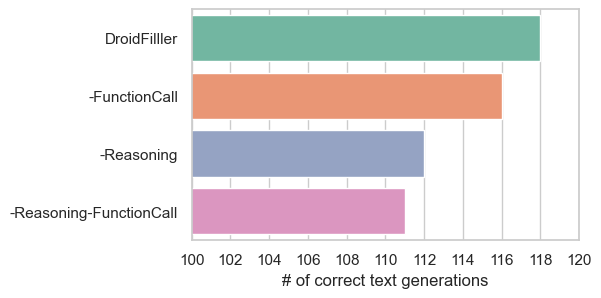

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(5, 3))

# bigger font 
sns.set(font_scale=2)

sns.set_theme(style="whitegrid")

# pretty palette
ax = sns.barplot(x="num_true", y="Technique", data=eval_df, palette="Set2")
# ax.set_title('Text Quality Comparison on Different Ablation Settings', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('# of correct text generations')
# xtick should be integer
ax.set_xlim(100, 120)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


# save figure
plt.savefig('/Users/greenmon/Dropbox/COINSE/DroidFiller/figures/RQ3_ablation.pdf', bbox_inches='tight')